In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("wine_data.csv")
df.sample(5)

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
128,2,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342
118,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372
151,3,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
107,2,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560


In [8]:
df = df[["class_label", "alcohol", "malic_acid"]]
df.sample(5)

,class_label,alcohol,malic_acid
108,2,12.22,1.29
103,2,11.82,1.72
37,1,13.05,1.65
80,2,12.00,0.92
151,3,12.79,2.67


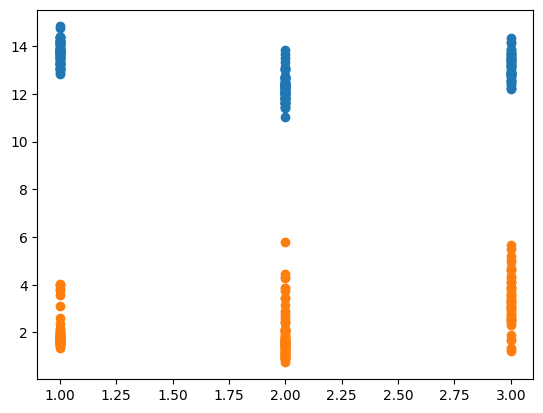

In [14]:
plt.scatter(df["class_label"],df["alcohol"])
plt.scatter(df["class_label"],df["malic_acid"])
plt.show()

<Axes: xlabel='alcohol', ylabel='Density'>

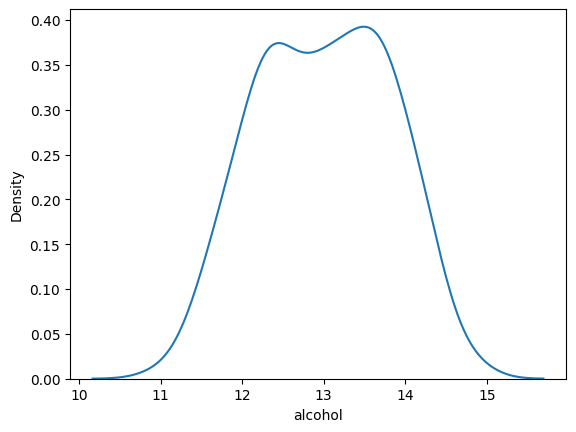

In [18]:
sns.kdeplot(df["alcohol"])

<Axes: xlabel='malic_acid', ylabel='Density'>

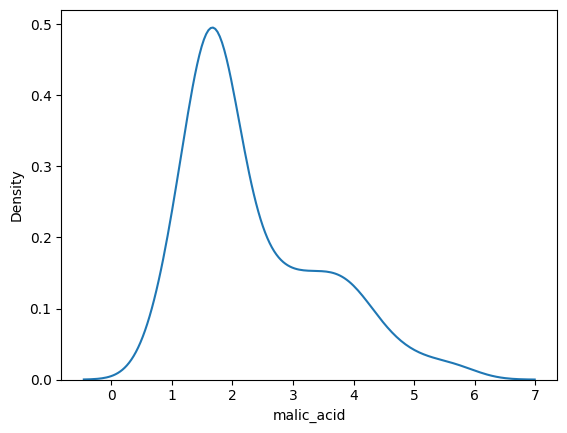

In [20]:
sns.kdeplot(df['malic_acid'])

<Axes: xlabel='alcohol', ylabel='malic_acid'>

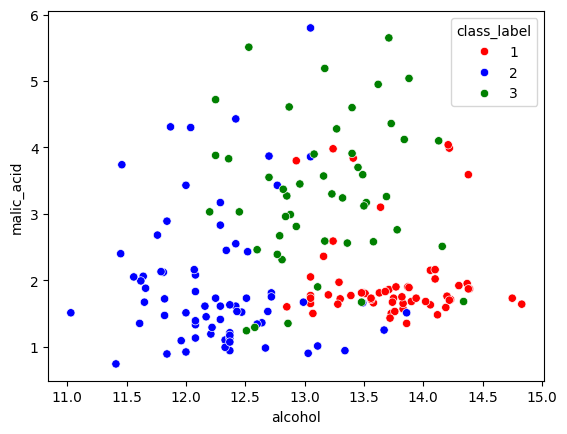

In [23]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x='alcohol', y='malic_acid', hue='class_label', data=df, palette=color_dict)

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df[["alcohol","malic_acid"]],df["class_label"],test_size=0.20,random_state=0)

In [ ]:
x_train.shape,x_test.shape

((142, 2), (36, 2))

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)


x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [36]:
np.round(x_train_scaled.describe(),1)

,alcohol,malic_acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


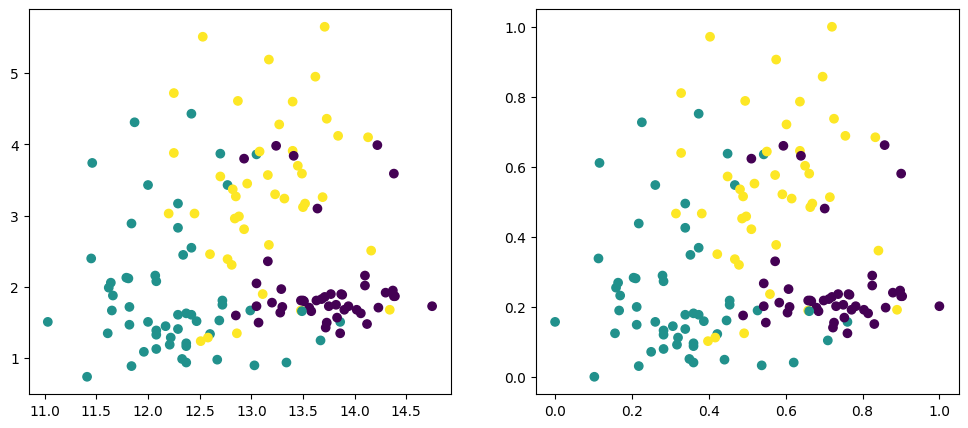

In [37]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train["alcohol"],x_train["malic_acid"],c=y_train)
ax2.scatter(x_train_scaled["alcohol"],x_train_scaled["malic_acid"],c=y_train)

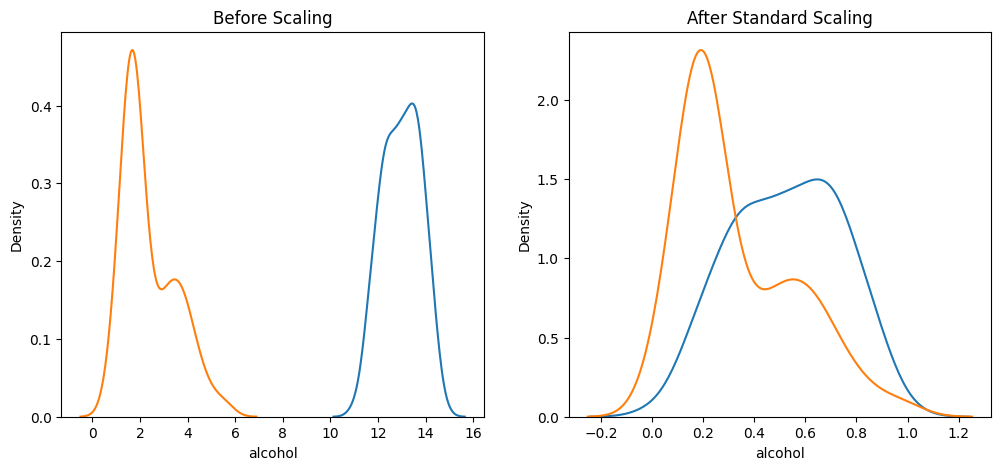

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)
sns.kdeplot(x_train['malic_acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['malic_acid'], ax=ax2)
plt.show()